In [0]:
import tensorflow.compat.v1 as tf #Vuelve a la versión anterior porque si no no funciona los placeholders
tf.disable_v2_behavior()
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
random_state = 13
np.random.seed(random_state)
tf.set_random_seed(random_state)

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
#Cargamos los datos
T = np.linspace(0.25,4.5,1000)
N = 32
data=pd.read_pickle('/content/drive/My Drive/TFG/Codigos/spins_32x32.pkl')
fase=pd.read_pickle('/content/drive/My Drive/TFG/Codigos/fase_32x32.pkl')


In [0]:
# Creamos el modelo
def singlelayer_sigmoid(x, weights, biases):
    layer_1 = tf.sigmoid(tf.matmul(x, weights['h1']) + biases['b1'])
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer
def evaluate_model(neuronas, lr, N,datos,fase,T):
    """Esta función entrena una red neuronal con los parámetros fijados

    neuronas: número de neuronas
    lr: SGD learning rate
    N: tamaño de la red 
    Ising datos: Ising data set de las configuraciones
    fase: calsificaiones de las configuraciones
    T : rango de temperaturas

    """
    #prefijamos algunos parámetros
    training_epochs=5000
    display_step = 100
    l2 = 2 * 1e-5
    batch_size=100
    n_input = N *N  # 2D red de Ising
    n_classes = 2 # dos clases

    #una sola capa oculta con n nueronas
    n_hidden_1 = neuronas

    # tf Graph inputs
    x = tf.placeholder("float", [None, n_input])
    y = tf.placeholder("float", [None, n_classes])

    # Guardamos los pesos y bias 
    weights = {
        'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
        'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
        }
    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden_1])),
        'out': tf.Variable(tf.constant(0.1, shape=[n_classes]))
        }
    # dividimos los datos en training and test set
    train_x, test_x, train_y, test_y,train_T, test_T = train_test_split(datos, fase, T,test_size=0.1, random_state=random_state)

    # Convertimos las fases en categóricas (vectores tipo [0,1] y [1,0])
    train_y=tf.keras.utils.to_categorical(train_y)
    test_y=tf.keras.utils.to_categorical(test_y)

    #creamos el modelo
    pred = singlelayer_sigmoid(x, weights, biases)
    # Definimos la función de costes y el optimizador
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
    regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['out'])
    cost = tf.reduce_mean(cost + l2 * regularizer)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)
    #creamos el modelo
    pred = singlelayer_sigmoid(x, weights, biases)
    
    # Inicializamos las variables
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    # train the DNN
    for epoch in range(training_epochs): 
    # Entrenamos la red
      _, c = sess.run([optimizer, cost], feed_dict={x: train_x, y: train_y})
      if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch + 1), "Cost =", "{:.3f}".format(c))
    # Comprobamos la precisión del modelo
    prediccion = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    precision = tf.reduce_mean(tf.cast(prediccion, "float"))
    print('Red neuronal lista!')
    print('Precisión obtenida: {:.3f}'.format(precision.eval({x: test_x, y: test_y})))

    # Definemos la capa de salida - softmax
    output = tf.nn.softmax(singlelayer_sigmoid(tf.cast(test_x, tf.float32), weights, biases))

    #Devolvemos las precisiones sobre la data de entrenamiento y de test
    precision_train=precision.eval({x:train_x, y:train_y})
    precision_test=precision.eval({x: test_x, y: test_y})

    return (precision_train,precision_test)

In [0]:
neuronas=100
lr=0.01
evaluate_model(neuronas, lr, N,data,fase,T)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 2.871
Epoch: 0101 Cost = 0.854
Epoch: 0201 Cost = 0.731
Epoch: 0301 Cost = 0.650
Epoch: 0401 Cost = 0.583
Epoch: 0501 Cost = 0.528
Epoch: 0601 Cost = 0.485
Epoch: 0701 Cost = 0.451
Epoch: 0801 Cost = 0.424
Epoch: 0901 Cost = 0.402
Epoch: 1001 Cost = 0.384
Epoch: 1101 Cost = 0.369
Epoch: 1201 Cost = 0.356
Epoch: 1301 Cost = 0.345
Epoch: 1401 Cost = 0.335
Epoch: 1501 Cost = 0.326
Epoch: 1601 Cost = 0.317
Epoch: 1701 Cost = 0.310
Epoch: 1801 Cost = 0.303
Epoch: 1901 Cost = 0.297
Epoch: 2001 Cost = 0.291
Epoch: 2101 Cost = 0.286
Epoch: 2201 Cost = 0.281
Epoch: 2301 Cost = 0.276
Epoch: 2401 Cost = 0.272
Epoch: 2501 Cost = 0.268
Epoch: 2601 Cost = 0.264
Epoch: 2701 Cost = 0.261
Epoch: 2801 Cost = 0.257
Epoch: 2901 Cost = 0.254
Epoch: 3001 Cost = 0.251
Epoch: 3101 Cost = 0.248
Epoch: 3201 Cost = 0.245
Epoch: 3301 Cost = 0.243
Epoch: 3401 Cost = 0.240
Epoch: 3501 Cost = 0.238
Epoch: 3601 Cost = 0.235
Epoch: 3701 Cost = 0.233
Epoch: 3801 Cost = 0.231
Epoch: 3901 Cost = 0.229


(0.9488889, 0.91)

In [0]:
def grid_search(N_neuronas,learning_rates):
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # creamos las variables para guardar las precisiones
    precision_train=np.zeros((len(N_neuronas),len(learning_rates)),dtype=np.float64)
    precision_test=np.zeros_like(precision_train)

    # recorremos los parametros y guardamos las precisiones
    for i, neuronas in enumerate(N_neuronas):
        for j, lr in enumerate(learning_rates):

            print("Entrenando con %4d neuronas, SGD y lr=%0.6f." %(neuronas,lr) )

            precision_train[i,j],precision_test[i,j]= evaluate_model(neuronas,lr,N,data,fase,T)


    plot_data(learning_rates,N_neuronas,precision_train, 'Entrenamiento')
    plot_data(learning_rates,N_neuronas,precision_test, 'Prueba')

In [0]:
#creamos una función para visualizar los resultados
def plot_data(x,y,data,title=None):

    fontsize=12
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest',cmap='summer', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('Precisión (%)',rotation=90,fontsize=fontsize)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{Neuronas}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show()

Entrenando con   10 neuronas, SGD y lr=0.000001.
Epoch: 0001 Cost = 1.893
Epoch: 0101 Cost = 1.893
Epoch: 0201 Cost = 1.893
Epoch: 0301 Cost = 1.893
Epoch: 0401 Cost = 1.893
Epoch: 0501 Cost = 1.892
Epoch: 0601 Cost = 1.892
Epoch: 0701 Cost = 1.892
Epoch: 0801 Cost = 1.892
Epoch: 0901 Cost = 1.892
Epoch: 1001 Cost = 1.892
Epoch: 1101 Cost = 1.892
Epoch: 1201 Cost = 1.891
Epoch: 1301 Cost = 1.891
Epoch: 1401 Cost = 1.891
Epoch: 1501 Cost = 1.891
Epoch: 1601 Cost = 1.891
Epoch: 1701 Cost = 1.891
Epoch: 1801 Cost = 1.891
Epoch: 1901 Cost = 1.890
Epoch: 2001 Cost = 1.890
Epoch: 2101 Cost = 1.890
Epoch: 2201 Cost = 1.890
Epoch: 2301 Cost = 1.890
Epoch: 2401 Cost = 1.890
Epoch: 2501 Cost = 1.890
Epoch: 2601 Cost = 1.889
Epoch: 2701 Cost = 1.889
Epoch: 2801 Cost = 1.889
Epoch: 2901 Cost = 1.889
Epoch: 3001 Cost = 1.889
Epoch: 3101 Cost = 1.889
Epoch: 3201 Cost = 1.888
Epoch: 3301 Cost = 1.888
Epoch: 3401 Cost = 1.888
Epoch: 3501 Cost = 1.888
Epoch: 3601 Cost = 1.888
Epoch: 3701 Cost = 1.888
E

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0101 Cost = 0.978
Epoch: 0201 Cost = 0.978
Epoch: 0301 Cost = 0.978
Epoch: 0401 Cost = 0.978
Epoch: 0501 Cost = 0.977
Epoch: 0601 Cost = 0.977
Epoch: 0701 Cost = 0.977
Epoch: 0801 Cost = 0.977
Epoch: 0901 Cost = 0.977
Epoch: 1001 Cost = 0.977
Epoch: 1101 Cost = 0.976
Epoch: 1201 Cost = 0.976
Epoch: 1301 Cost = 0.976
Epoch: 1401 Cost = 0.976
Epoch: 1501 Cost = 0.976
Epoch: 1601 Cost = 0.976
Epoch: 1701 Cost = 0.975
Epoch: 1801 Cost = 0.975
Epoch: 1901 Cost = 0.975
Epoch: 2001 Cost = 0.975
Epoch: 2101 Cost = 0.975
Epoch: 2201 Cost = 0.975
Epoch: 2301 Cost = 0.974
Epoch: 2401 Cost = 0.974
Epoch: 2501 Cost = 0.974
Epoch: 2601 Cost = 0.974
Epoch: 2701 Cost = 0.974
Epoch: 2801 Cost = 0.974
Epoch: 2901 Cost = 0.973
Epoch: 3001 Cost = 0.973
Epoch: 3101 Cost = 0.973
Epoch: 3201 Cost = 0.973
Epoch: 3301 Cost = 0.973
Epoch: 3401 Cost = 0.973
Epoch: 3501 Cost = 0.972
Epoch: 3601 Cost = 0.972
Epoch: 3701 Cost = 0.972
Epoch: 3801 Cost = 0.972
Epoch: 3901 Cost = 0.972
Epoch: 4001 Cost = 0.972


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0101 Cost = 2.776
Epoch: 0201 Cost = 2.749
Epoch: 0301 Cost = 2.722
Epoch: 0401 Cost = 2.695
Epoch: 0501 Cost = 2.667
Epoch: 0601 Cost = 2.641
Epoch: 0701 Cost = 2.614
Epoch: 0801 Cost = 2.587
Epoch: 0901 Cost = 2.561
Epoch: 1001 Cost = 2.534
Epoch: 1101 Cost = 2.508
Epoch: 1201 Cost = 2.482
Epoch: 1301 Cost = 2.456
Epoch: 1401 Cost = 2.430
Epoch: 1501 Cost = 2.405
Epoch: 1601 Cost = 2.379
Epoch: 1701 Cost = 2.354
Epoch: 1801 Cost = 2.329
Epoch: 1901 Cost = 2.304
Epoch: 2001 Cost = 2.279
Epoch: 2101 Cost = 2.255
Epoch: 2201 Cost = 2.230
Epoch: 2301 Cost = 2.206
Epoch: 2401 Cost = 2.182
Epoch: 2501 Cost = 2.158
Epoch: 2601 Cost = 2.134
Epoch: 2701 Cost = 2.111
Epoch: 2801 Cost = 2.087
Epoch: 2901 Cost = 2.064
Epoch: 3001 Cost = 2.041
Epoch: 3101 Cost = 2.018
Epoch: 3201 Cost = 1.996
Epoch: 3301 Cost = 1.973
Epoch: 3401 Cost = 1.951
Epoch: 3501 Cost = 1.929
Epoch: 3601 Cost = 1.907
Epoch: 3701 Cost = 1.886
Epoch: 3801 Cost = 1.864
Epoch: 3901 Cost = 1.843
Epoch: 4001 Cost = 1.822


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0101 Cost = 0.789
Epoch: 0201 Cost = 0.785
Epoch: 0301 Cost = 0.780
Epoch: 0401 Cost = 0.775
Epoch: 0501 Cost = 0.771
Epoch: 0601 Cost = 0.766
Epoch: 0701 Cost = 0.762
Epoch: 0801 Cost = 0.757
Epoch: 0901 Cost = 0.753
Epoch: 1001 Cost = 0.749
Epoch: 1101 Cost = 0.745
Epoch: 1201 Cost = 0.741
Epoch: 1301 Cost = 0.736
Epoch: 1401 Cost = 0.732
Epoch: 1501 Cost = 0.728
Epoch: 1601 Cost = 0.725
Epoch: 1701 Cost = 0.721
Epoch: 1801 Cost = 0.717
Epoch: 1901 Cost = 0.713
Epoch: 2001 Cost = 0.710
Epoch: 2101 Cost = 0.706
Epoch: 2201 Cost = 0.703
Epoch: 2301 Cost = 0.699
Epoch: 2401 Cost = 0.696
Epoch: 2501 Cost = 0.692
Epoch: 2601 Cost = 0.689
Epoch: 2701 Cost = 0.685
Epoch: 2801 Cost = 0.682
Epoch: 2901 Cost = 0.679
Epoch: 3001 Cost = 0.675
Epoch: 3101 Cost = 0.672
Epoch: 3201 Cost = 0.668
Epoch: 3301 Cost = 0.665
Epoch: 3401 Cost = 0.662
Epoch: 3501 Cost = 0.659
Epoch: 3601 Cost = 0.655
Epoch: 3701 Cost = 0.653
Epoch: 3801 Cost = 0.650
Epoch: 3901 Cost = 0.647
Epoch: 4001 Cost = 0.645


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0101 Cost = 0.762
Epoch: 0201 Cost = 0.697
Epoch: 0301 Cost = 0.661
Epoch: 0401 Cost = 0.632
Epoch: 0501 Cost = 0.607
Epoch: 0601 Cost = 0.586
Epoch: 0701 Cost = 0.568
Epoch: 0801 Cost = 0.552
Epoch: 0901 Cost = 0.537
Epoch: 1001 Cost = 0.524
Epoch: 1101 Cost = 0.511
Epoch: 1201 Cost = 0.501
Epoch: 1301 Cost = 0.491
Epoch: 1401 Cost = 0.483
Epoch: 1501 Cost = 0.475
Epoch: 1601 Cost = 0.468
Epoch: 1701 Cost = 0.462
Epoch: 1801 Cost = 0.456
Epoch: 1901 Cost = 0.451
Epoch: 2001 Cost = 0.446
Epoch: 2101 Cost = 0.441
Epoch: 2201 Cost = 0.437
Epoch: 2301 Cost = 0.432
Epoch: 2401 Cost = 0.428
Epoch: 2501 Cost = 0.424
Epoch: 2601 Cost = 0.419
Epoch: 2701 Cost = 0.415
Epoch: 2801 Cost = 0.411
Epoch: 2901 Cost = 0.407
Epoch: 3001 Cost = 0.404
Epoch: 3101 Cost = 0.400
Epoch: 3201 Cost = 0.398
Epoch: 3301 Cost = 0.395
Epoch: 3401 Cost = 0.392
Epoch: 3501 Cost = 0.389
Epoch: 3601 Cost = 0.386
Epoch: 3701 Cost = 0.384
Epoch: 3801 Cost = 0.382
Epoch: 3901 Cost = 0.379
Epoch: 4001 Cost = 0.377


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 2.096
Epoch: 0101 Cost = 0.489
Epoch: 0201 Cost = 0.401
Epoch: 0301 Cost = 0.358
Epoch: 0401 Cost = 0.332
Epoch: 0501 Cost = 0.312
Epoch: 0601 Cost = 0.296
Epoch: 0701 Cost = 0.281
Epoch: 0801 Cost = 0.269
Epoch: 0901 Cost = 0.258
Epoch: 1001 Cost = 0.248
Epoch: 1101 Cost = 0.239
Epoch: 1201 Cost = 0.233
Epoch: 1301 Cost = 0.227
Epoch: 1401 Cost = 0.222
Epoch: 1501 Cost = 0.217
Epoch: 1601 Cost = 0.213
Epoch: 1701 Cost = 0.210
Epoch: 1801 Cost = 0.207
Epoch: 1901 Cost = 0.205
Epoch: 2001 Cost = 0.203
Epoch: 2101 Cost = 0.201
Epoch: 2201 Cost = 0.199
Epoch: 2301 Cost = 0.197
Epoch: 2401 Cost = 0.196
Epoch: 2501 Cost = 0.195
Epoch: 2601 Cost = 0.194
Epoch: 2701 Cost = 0.193
Epoch: 2801 Cost = 0.191
Epoch: 2901 Cost = 0.190
Epoch: 3001 Cost = 0.189
Epoch: 3101 Cost = 0.188
Epoch: 3201 Cost = 0.187
Epoch: 3301 Cost = 0.186
Epoch: 3401 Cost = 0.185
Epoch: 3501 Cost = 0.183
Epoch: 3601 Cost = 0.182
Epoch: 3701 Cost = 0.180
Epoch: 3801 Cost = 0.179
Epoch: 3901 Cost = 0.178


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 6.222
Epoch: 0101 Cost = 6.221
Epoch: 0201 Cost = 6.219
Epoch: 0301 Cost = 6.218
Epoch: 0401 Cost = 6.216
Epoch: 0501 Cost = 6.214
Epoch: 0601 Cost = 6.213
Epoch: 0701 Cost = 6.211
Epoch: 0801 Cost = 6.210
Epoch: 0901 Cost = 6.208
Epoch: 1001 Cost = 6.207
Epoch: 1101 Cost = 6.205
Epoch: 1201 Cost = 6.203
Epoch: 1301 Cost = 6.202
Epoch: 1401 Cost = 6.200
Epoch: 1501 Cost = 6.199
Epoch: 1601 Cost = 6.197
Epoch: 1701 Cost = 6.196
Epoch: 1801 Cost = 6.194
Epoch: 1901 Cost = 6.192
Epoch: 2001 Cost = 6.191
Epoch: 2101 Cost = 6.189
Epoch: 2201 Cost = 6.188
Epoch: 2301 Cost = 6.186
Epoch: 2401 Cost = 6.185
Epoch: 2501 Cost = 6.183
Epoch: 2601 Cost = 6.181
Epoch: 2701 Cost = 6.180
Epoch: 2801 Cost = 6.178
Epoch: 2901 Cost = 6.177
Epoch: 3001 Cost = 6.175
Epoch: 3101 Cost = 6.174
Epoch: 3201 Cost = 6.172
Epoch: 3301 Cost = 6.170
Epoch: 3401 Cost = 6.169
Epoch: 3501 Cost = 6.167
Epoch: 3601 Cost = 6.166
Epoch: 3701 Cost = 6.164
Epoch: 3801 Cost = 6.163
Epoch: 3901 Cost = 6.161


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 2.548
Epoch: 0101 Cost = 2.542
Epoch: 0201 Cost = 2.536
Epoch: 0301 Cost = 2.530
Epoch: 0401 Cost = 2.524
Epoch: 0501 Cost = 2.518
Epoch: 0601 Cost = 2.512
Epoch: 0701 Cost = 2.506
Epoch: 0801 Cost = 2.501
Epoch: 0901 Cost = 2.495
Epoch: 1001 Cost = 2.489
Epoch: 1101 Cost = 2.484
Epoch: 1201 Cost = 2.478
Epoch: 1301 Cost = 2.473
Epoch: 1401 Cost = 2.468
Epoch: 1501 Cost = 2.462
Epoch: 1601 Cost = 2.457
Epoch: 1701 Cost = 2.452
Epoch: 1801 Cost = 2.447
Epoch: 1901 Cost = 2.442
Epoch: 2001 Cost = 2.437
Epoch: 2101 Cost = 2.432
Epoch: 2201 Cost = 2.427
Epoch: 2301 Cost = 2.422
Epoch: 2401 Cost = 2.417
Epoch: 2501 Cost = 2.413
Epoch: 2601 Cost = 2.408
Epoch: 2701 Cost = 2.403
Epoch: 2801 Cost = 2.399
Epoch: 2901 Cost = 2.394
Epoch: 3001 Cost = 2.390
Epoch: 3101 Cost = 2.385
Epoch: 3201 Cost = 2.381
Epoch: 3301 Cost = 2.377
Epoch: 3401 Cost = 2.372
Epoch: 3501 Cost = 2.368
Epoch: 3601 Cost = 2.364
Epoch: 3701 Cost = 2.360
Epoch: 3801 Cost = 2.356
Epoch: 3901 Cost = 2.352


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 5.916
Epoch: 0101 Cost = 4.589
Epoch: 0201 Cost = 3.982
Epoch: 0301 Cost = 3.768
Epoch: 0401 Cost = 3.661
Epoch: 0501 Cost = 3.586
Epoch: 0601 Cost = 3.525
Epoch: 0701 Cost = 3.471
Epoch: 0801 Cost = 3.422
Epoch: 0901 Cost = 3.375
Epoch: 1001 Cost = 3.330
Epoch: 1101 Cost = 3.286
Epoch: 1201 Cost = 3.243
Epoch: 1301 Cost = 3.201
Epoch: 1401 Cost = 3.160
Epoch: 1501 Cost = 3.120
Epoch: 1601 Cost = 3.080
Epoch: 1701 Cost = 3.041
Epoch: 1801 Cost = 3.002
Epoch: 1901 Cost = 2.965
Epoch: 2001 Cost = 2.929
Epoch: 2101 Cost = 2.894
Epoch: 2201 Cost = 2.861
Epoch: 2301 Cost = 2.829
Epoch: 2401 Cost = 2.798
Epoch: 2501 Cost = 2.768
Epoch: 2601 Cost = 2.740
Epoch: 2701 Cost = 2.713
Epoch: 2801 Cost = 2.687
Epoch: 2901 Cost = 2.662
Epoch: 3001 Cost = 2.638
Epoch: 3101 Cost = 2.614
Epoch: 3201 Cost = 2.592
Epoch: 3301 Cost = 2.571
Epoch: 3401 Cost = 2.550
Epoch: 3501 Cost = 2.531
Epoch: 3601 Cost = 2.512
Epoch: 3701 Cost = 2.493
Epoch: 3801 Cost = 2.476
Epoch: 3901 Cost = 2.459


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 7.909
Epoch: 0101 Cost = 5.909
Epoch: 0201 Cost = 4.649
Epoch: 0301 Cost = 3.875
Epoch: 0401 Cost = 3.310
Epoch: 0501 Cost = 2.934
Epoch: 0601 Cost = 2.670
Epoch: 0701 Cost = 2.483
Epoch: 0801 Cost = 2.341
Epoch: 0901 Cost = 2.227
Epoch: 1001 Cost = 2.135
Epoch: 1101 Cost = 2.059
Epoch: 1201 Cost = 1.995
Epoch: 1301 Cost = 1.938
Epoch: 1401 Cost = 1.889
Epoch: 1501 Cost = 1.845
Epoch: 1601 Cost = 1.807
Epoch: 1701 Cost = 1.774
Epoch: 1801 Cost = 1.744
Epoch: 1901 Cost = 1.717
Epoch: 2001 Cost = 1.693
Epoch: 2101 Cost = 1.670
Epoch: 2201 Cost = 1.649
Epoch: 2301 Cost = 1.630
Epoch: 2401 Cost = 1.611
Epoch: 2501 Cost = 1.594
Epoch: 2601 Cost = 1.578
Epoch: 2701 Cost = 1.562
Epoch: 2801 Cost = 1.547
Epoch: 2901 Cost = 1.532
Epoch: 3001 Cost = 1.518
Epoch: 3101 Cost = 1.505
Epoch: 3201 Cost = 1.492
Epoch: 3301 Cost = 1.480
Epoch: 3401 Cost = 1.469
Epoch: 3501 Cost = 1.459
Epoch: 3601 Cost = 1.449
Epoch: 3701 Cost = 1.440
Epoch: 3801 Cost = 1.431
Epoch: 3901 Cost = 1.423


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 2.844
Epoch: 0101 Cost = 1.555
Epoch: 0201 Cost = 1.441
Epoch: 0301 Cost = 1.373
Epoch: 0401 Cost = 1.332
Epoch: 0501 Cost = 1.303
Epoch: 0601 Cost = 1.280
Epoch: 0701 Cost = 1.263
Epoch: 0801 Cost = 1.249
Epoch: 0901 Cost = 1.236
Epoch: 1001 Cost = 1.224
Epoch: 1101 Cost = 1.214
Epoch: 1201 Cost = 1.204
Epoch: 1301 Cost = 1.195
Epoch: 1401 Cost = 1.188
Epoch: 1501 Cost = 1.181
Epoch: 1601 Cost = 1.175
Epoch: 1701 Cost = 1.169
Epoch: 1801 Cost = 1.165
Epoch: 1901 Cost = 1.160
Epoch: 2001 Cost = 1.156
Epoch: 2101 Cost = 1.153
Epoch: 2201 Cost = 1.149
Epoch: 2301 Cost = 1.146
Epoch: 2401 Cost = 1.143
Epoch: 2501 Cost = 1.140
Epoch: 2601 Cost = 1.137
Epoch: 2701 Cost = 1.134
Epoch: 2801 Cost = 1.131
Epoch: 2901 Cost = 1.128
Epoch: 3001 Cost = 1.126
Epoch: 3101 Cost = 1.123
Epoch: 3201 Cost = 1.121
Epoch: 3301 Cost = 1.118
Epoch: 3401 Cost = 1.116
Epoch: 3501 Cost = 1.113
Epoch: 3601 Cost = 1.111
Epoch: 3701 Cost = 1.109
Epoch: 3801 Cost = 1.107
Epoch: 3901 Cost = 1.105


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 3.367
Epoch: 0101 Cost = 1.123
Epoch: 0201 Cost = 1.092
Epoch: 0301 Cost = 1.075
Epoch: 0401 Cost = 1.065
Epoch: 0501 Cost = 1.057
Epoch: 0601 Cost = 1.052
Epoch: 0701 Cost = 1.048
Epoch: 0801 Cost = 1.045
Epoch: 0901 Cost = 1.042
Epoch: 1001 Cost = 1.040
Epoch: 1101 Cost = 1.038
Epoch: 1201 Cost = 1.037
Epoch: 1301 Cost = 1.036
Epoch: 1401 Cost = 1.034
Epoch: 1501 Cost = 1.033
Epoch: 1601 Cost = 1.032
Epoch: 1701 Cost = 1.032
Epoch: 1801 Cost = 1.031
Epoch: 1901 Cost = 1.030
Epoch: 2001 Cost = 1.029
Epoch: 2101 Cost = 1.029
Epoch: 2201 Cost = 1.028
Epoch: 2301 Cost = 1.027
Epoch: 2401 Cost = 1.027
Epoch: 2501 Cost = 1.026
Epoch: 2601 Cost = 1.026
Epoch: 2701 Cost = 1.025
Epoch: 2801 Cost = 1.024
Epoch: 2901 Cost = 1.024
Epoch: 3001 Cost = 1.023
Epoch: 3101 Cost = 1.023
Epoch: 3201 Cost = 1.022
Epoch: 3301 Cost = 1.022
Epoch: 3401 Cost = 1.021
Epoch: 3501 Cost = 1.021
Epoch: 3601 Cost = 1.020
Epoch: 3701 Cost = 1.020
Epoch: 3801 Cost = 1.019
Epoch: 3901 Cost = 1.019


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 12.702
Epoch: 0101 Cost = 12.698
Epoch: 0201 Cost = 12.694
Epoch: 0301 Cost = 12.690
Epoch: 0401 Cost = 12.686
Epoch: 0501 Cost = 12.682
Epoch: 0601 Cost = 12.678
Epoch: 0701 Cost = 12.674
Epoch: 0801 Cost = 12.670
Epoch: 0901 Cost = 12.666
Epoch: 1001 Cost = 12.662
Epoch: 1101 Cost = 12.658
Epoch: 1201 Cost = 12.654
Epoch: 1301 Cost = 12.650
Epoch: 1401 Cost = 12.646
Epoch: 1501 Cost = 12.642
Epoch: 1601 Cost = 12.638
Epoch: 1701 Cost = 12.634
Epoch: 1801 Cost = 12.630
Epoch: 1901 Cost = 12.626
Epoch: 2001 Cost = 12.622
Epoch: 2101 Cost = 12.618
Epoch: 2201 Cost = 12.614
Epoch: 2301 Cost = 12.610
Epoch: 2401 Cost = 12.606
Epoch: 2501 Cost = 12.602
Epoch: 2601 Cost = 12.598
Epoch: 2701 Cost = 12.594
Epoch: 2801 Cost = 12.590
Epoch: 2901 Cost = 12.586
Epoch: 3001 Cost = 12.582
Epoch: 3101 Cost = 12.578
Epoch: 3201 Cost = 12.574
Epoch: 3301 Cost = 12.570
Epoch: 3401 Cost = 12.566
Epoch: 3501 Cost = 12.562
Epoch: 3601 Cost = 12.558
Epoch: 3701 Cost = 12.554
Epoch: 3801 

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 4.299
Epoch: 0101 Cost = 4.289
Epoch: 0201 Cost = 4.280
Epoch: 0301 Cost = 4.270
Epoch: 0401 Cost = 4.261
Epoch: 0501 Cost = 4.252
Epoch: 0601 Cost = 4.243
Epoch: 0701 Cost = 4.235
Epoch: 0801 Cost = 4.226
Epoch: 0901 Cost = 4.218
Epoch: 1001 Cost = 4.209
Epoch: 1101 Cost = 4.201
Epoch: 1201 Cost = 4.193
Epoch: 1301 Cost = 4.185
Epoch: 1401 Cost = 4.177
Epoch: 1501 Cost = 4.170
Epoch: 1601 Cost = 4.162
Epoch: 1701 Cost = 4.154
Epoch: 1801 Cost = 4.147
Epoch: 1901 Cost = 4.140
Epoch: 2001 Cost = 4.132
Epoch: 2101 Cost = 4.125
Epoch: 2201 Cost = 4.118
Epoch: 2301 Cost = 4.111
Epoch: 2401 Cost = 4.104
Epoch: 2501 Cost = 4.097
Epoch: 2601 Cost = 4.090
Epoch: 2701 Cost = 4.083
Epoch: 2801 Cost = 4.077
Epoch: 2901 Cost = 4.070
Epoch: 3001 Cost = 4.063
Epoch: 3101 Cost = 4.057
Epoch: 3201 Cost = 4.050
Epoch: 3301 Cost = 4.044
Epoch: 3401 Cost = 4.037
Epoch: 3501 Cost = 4.031
Epoch: 3601 Cost = 4.025
Epoch: 3701 Cost = 4.018
Epoch: 3801 Cost = 4.012
Epoch: 3901 Cost = 4.006


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 8.994
Epoch: 0101 Cost = 7.943
Epoch: 0201 Cost = 6.748
Epoch: 0301 Cost = 5.745
Epoch: 0401 Cost = 5.081
Epoch: 0501 Cost = 4.629
Epoch: 0601 Cost = 4.306
Epoch: 0701 Cost = 4.079
Epoch: 0801 Cost = 3.922
Epoch: 0901 Cost = 3.814
Epoch: 1001 Cost = 3.737
Epoch: 1101 Cost = 3.680
Epoch: 1201 Cost = 3.634
Epoch: 1301 Cost = 3.596
Epoch: 1401 Cost = 3.562
Epoch: 1501 Cost = 3.530
Epoch: 1601 Cost = 3.501
Epoch: 1701 Cost = 3.473
Epoch: 1801 Cost = 3.445
Epoch: 1901 Cost = 3.418
Epoch: 2001 Cost = 3.392
Epoch: 2101 Cost = 3.367
Epoch: 2201 Cost = 3.342
Epoch: 2301 Cost = 3.319
Epoch: 2401 Cost = 3.296
Epoch: 2501 Cost = 3.274
Epoch: 2601 Cost = 3.254
Epoch: 2701 Cost = 3.234
Epoch: 2801 Cost = 3.215
Epoch: 2901 Cost = 3.197
Epoch: 3001 Cost = 3.180
Epoch: 3101 Cost = 3.164
Epoch: 3201 Cost = 3.148
Epoch: 3301 Cost = 3.133
Epoch: 3401 Cost = 3.118
Epoch: 3501 Cost = 3.104
Epoch: 3601 Cost = 3.090
Epoch: 3701 Cost = 3.077
Epoch: 3801 Cost = 3.064
Epoch: 3901 Cost = 3.051


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 10.746
Epoch: 0101 Cost = 3.442
Epoch: 0201 Cost = 3.196
Epoch: 0301 Cost = 3.086
Epoch: 0401 Cost = 2.999
Epoch: 0501 Cost = 2.927
Epoch: 0601 Cost = 2.865
Epoch: 0701 Cost = 2.812
Epoch: 0801 Cost = 2.767
Epoch: 0901 Cost = 2.727
Epoch: 1001 Cost = 2.693
Epoch: 1101 Cost = 2.662
Epoch: 1201 Cost = 2.634
Epoch: 1301 Cost = 2.610
Epoch: 1401 Cost = 2.587
Epoch: 1501 Cost = 2.567
Epoch: 1601 Cost = 2.548
Epoch: 1701 Cost = 2.531
Epoch: 1801 Cost = 2.516
Epoch: 1901 Cost = 2.501
Epoch: 2001 Cost = 2.488
Epoch: 2101 Cost = 2.475
Epoch: 2201 Cost = 2.463
Epoch: 2301 Cost = 2.452
Epoch: 2401 Cost = 2.442
Epoch: 2501 Cost = 2.432
Epoch: 2601 Cost = 2.423
Epoch: 2701 Cost = 2.415
Epoch: 2801 Cost = 2.407
Epoch: 2901 Cost = 2.399
Epoch: 3001 Cost = 2.392
Epoch: 3101 Cost = 2.385
Epoch: 3201 Cost = 2.379
Epoch: 3301 Cost = 2.373
Epoch: 3401 Cost = 2.367
Epoch: 3501 Cost = 2.361
Epoch: 3601 Cost = 2.356
Epoch: 3701 Cost = 2.351
Epoch: 3801 Cost = 2.346
Epoch: 3901 Cost = 2.342

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 12.745
Epoch: 0101 Cost = 2.572
Epoch: 0201 Cost = 2.439
Epoch: 0301 Cost = 2.372
Epoch: 0401 Cost = 2.329
Epoch: 0501 Cost = 2.297
Epoch: 0601 Cost = 2.275
Epoch: 0701 Cost = 2.258
Epoch: 0801 Cost = 2.244
Epoch: 0901 Cost = 2.232
Epoch: 1001 Cost = 2.221
Epoch: 1101 Cost = 2.212
Epoch: 1201 Cost = 2.203
Epoch: 1301 Cost = 2.195
Epoch: 1401 Cost = 2.188
Epoch: 1501 Cost = 2.182
Epoch: 1601 Cost = 2.177
Epoch: 1701 Cost = 2.171
Epoch: 1801 Cost = 2.167
Epoch: 1901 Cost = 2.162
Epoch: 2001 Cost = 2.158
Epoch: 2101 Cost = 2.155
Epoch: 2201 Cost = 2.151
Epoch: 2301 Cost = 2.148
Epoch: 2401 Cost = 2.145
Epoch: 2501 Cost = 2.142
Epoch: 2601 Cost = 2.139
Epoch: 2701 Cost = 2.137
Epoch: 2801 Cost = 2.134
Epoch: 2901 Cost = 2.132
Epoch: 3001 Cost = 2.130
Epoch: 3101 Cost = 2.128
Epoch: 3201 Cost = 2.126
Epoch: 3301 Cost = 2.124
Epoch: 3401 Cost = 2.122
Epoch: 3501 Cost = 2.120
Epoch: 3601 Cost = 2.118
Epoch: 3701 Cost = 2.117
Epoch: 3801 Cost = 2.115
Epoch: 3901 Cost = 2.114

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 14.246
Epoch: 0101 Cost = 2.234
Epoch: 0201 Cost = 2.167
Epoch: 0301 Cost = 2.123
Epoch: 0401 Cost = 2.095
Epoch: 0501 Cost = 2.078
Epoch: 0601 Cost = 2.067
Epoch: 0701 Cost = 2.060
Epoch: 0801 Cost = 2.056
Epoch: 0901 Cost = 2.053
Epoch: 1001 Cost = 2.051
Epoch: 1101 Cost = 2.049
Epoch: 1201 Cost = 2.048
Epoch: 1301 Cost = 2.047
Epoch: 1401 Cost = 2.045
Epoch: 1501 Cost = 2.044
Epoch: 1601 Cost = 2.043
Epoch: 1701 Cost = 2.042
Epoch: 1801 Cost = 2.041
Epoch: 1901 Cost = 2.040
Epoch: 2001 Cost = 2.039
Epoch: 2101 Cost = 2.038
Epoch: 2201 Cost = 2.037
Epoch: 2301 Cost = 2.036
Epoch: 2401 Cost = 2.035
Epoch: 2501 Cost = 2.034
Epoch: 2601 Cost = 2.033
Epoch: 2701 Cost = 2.032
Epoch: 2801 Cost = 2.031
Epoch: 2901 Cost = 2.031
Epoch: 3001 Cost = 2.030
Epoch: 3101 Cost = 2.029
Epoch: 3201 Cost = 2.028
Epoch: 3301 Cost = 2.027
Epoch: 3401 Cost = 2.026
Epoch: 3501 Cost = 2.025
Epoch: 3601 Cost = 2.024
Epoch: 3701 Cost = 2.024
Epoch: 3801 Cost = 2.023
Epoch: 3901 Cost = 2.022

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 25.020
Epoch: 0101 Cost = 25.010
Epoch: 0201 Cost = 25.000
Epoch: 0301 Cost = 24.990
Epoch: 0401 Cost = 24.980
Epoch: 0501 Cost = 24.970
Epoch: 0601 Cost = 24.960
Epoch: 0701 Cost = 24.950
Epoch: 0801 Cost = 24.940
Epoch: 0901 Cost = 24.930
Epoch: 1001 Cost = 24.920
Epoch: 1101 Cost = 24.910
Epoch: 1201 Cost = 24.900
Epoch: 1301 Cost = 24.890
Epoch: 1401 Cost = 24.880
Epoch: 1501 Cost = 24.870
Epoch: 1601 Cost = 24.860
Epoch: 1701 Cost = 24.850
Epoch: 1801 Cost = 24.840
Epoch: 1901 Cost = 24.830
Epoch: 2001 Cost = 24.820
Epoch: 2101 Cost = 24.809
Epoch: 2201 Cost = 24.799
Epoch: 2301 Cost = 24.789
Epoch: 2401 Cost = 24.779
Epoch: 2501 Cost = 24.769
Epoch: 2601 Cost = 24.759
Epoch: 2701 Cost = 24.749
Epoch: 2801 Cost = 24.739
Epoch: 2901 Cost = 24.729
Epoch: 3001 Cost = 24.719
Epoch: 3101 Cost = 24.709
Epoch: 3201 Cost = 24.699
Epoch: 3301 Cost = 24.689
Epoch: 3401 Cost = 24.679
Epoch: 3501 Cost = 24.669
Epoch: 3601 Cost = 24.659
Epoch: 3701 Cost = 24.649
Epoch: 3801 

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 12.199
Epoch: 0101 Cost = 12.124
Epoch: 0201 Cost = 12.050
Epoch: 0301 Cost = 11.978
Epoch: 0401 Cost = 11.906
Epoch: 0501 Cost = 11.835
Epoch: 0601 Cost = 11.765
Epoch: 0701 Cost = 11.697
Epoch: 0801 Cost = 11.629
Epoch: 0901 Cost = 11.563
Epoch: 1001 Cost = 11.497
Epoch: 1101 Cost = 11.433
Epoch: 1201 Cost = 11.370
Epoch: 1301 Cost = 11.308
Epoch: 1401 Cost = 11.247
Epoch: 1501 Cost = 11.187
Epoch: 1601 Cost = 11.129
Epoch: 1701 Cost = 11.071
Epoch: 1801 Cost = 11.015
Epoch: 1901 Cost = 10.961
Epoch: 2001 Cost = 10.907
Epoch: 2101 Cost = 10.855
Epoch: 2201 Cost = 10.805
Epoch: 2301 Cost = 10.756
Epoch: 2401 Cost = 10.708
Epoch: 2501 Cost = 10.661
Epoch: 2601 Cost = 10.616
Epoch: 2701 Cost = 10.572
Epoch: 2801 Cost = 10.530
Epoch: 2901 Cost = 10.488
Epoch: 3001 Cost = 10.447
Epoch: 3101 Cost = 10.408
Epoch: 3201 Cost = 10.369
Epoch: 3301 Cost = 10.331
Epoch: 3401 Cost = 10.294
Epoch: 3501 Cost = 10.258
Epoch: 3601 Cost = 10.222
Epoch: 3701 Cost = 10.187
Epoch: 3801 

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 11.468
Epoch: 0101 Cost = 10.831
Epoch: 0201 Cost = 10.309
Epoch: 0301 Cost = 9.889
Epoch: 0401 Cost = 9.549
Epoch: 0501 Cost = 9.268
Epoch: 0601 Cost = 9.025
Epoch: 0701 Cost = 8.812
Epoch: 0801 Cost = 8.622
Epoch: 0901 Cost = 8.454
Epoch: 1001 Cost = 8.302
Epoch: 1101 Cost = 8.166
Epoch: 1201 Cost = 8.043
Epoch: 1301 Cost = 7.930
Epoch: 1401 Cost = 7.826
Epoch: 1501 Cost = 7.731
Epoch: 1601 Cost = 7.642
Epoch: 1701 Cost = 7.559
Epoch: 1801 Cost = 7.482
Epoch: 1901 Cost = 7.409
Epoch: 2001 Cost = 7.341
Epoch: 2101 Cost = 7.277
Epoch: 2201 Cost = 7.217
Epoch: 2301 Cost = 7.160
Epoch: 2401 Cost = 7.107
Epoch: 2501 Cost = 7.056
Epoch: 2601 Cost = 7.009
Epoch: 2701 Cost = 6.964
Epoch: 2801 Cost = 6.922
Epoch: 2901 Cost = 6.881
Epoch: 3001 Cost = 6.843
Epoch: 3101 Cost = 6.807
Epoch: 3201 Cost = 6.773
Epoch: 3301 Cost = 6.740
Epoch: 3401 Cost = 6.710
Epoch: 3501 Cost = 6.680
Epoch: 3601 Cost = 6.652
Epoch: 3701 Cost = 6.626
Epoch: 3801 Cost = 6.601
Epoch: 3901 Cost = 6.5

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 29.188
Epoch: 0101 Cost = 7.455
Epoch: 0201 Cost = 6.772
Epoch: 0301 Cost = 6.546
Epoch: 0401 Cost = 6.383
Epoch: 0501 Cost = 6.259
Epoch: 0601 Cost = 6.162
Epoch: 0701 Cost = 6.083
Epoch: 0801 Cost = 6.016
Epoch: 0901 Cost = 5.958
Epoch: 1001 Cost = 5.907
Epoch: 1101 Cost = 5.861
Epoch: 1201 Cost = 5.820
Epoch: 1301 Cost = 5.784
Epoch: 1401 Cost = 5.750
Epoch: 1501 Cost = 5.721
Epoch: 1601 Cost = 5.694
Epoch: 1701 Cost = 5.670
Epoch: 1801 Cost = 5.648
Epoch: 1901 Cost = 5.628
Epoch: 2001 Cost = 5.610
Epoch: 2101 Cost = 5.594
Epoch: 2201 Cost = 5.580
Epoch: 2301 Cost = 5.566
Epoch: 2401 Cost = 5.554
Epoch: 2501 Cost = 5.543
Epoch: 2601 Cost = 5.533
Epoch: 2701 Cost = 5.523
Epoch: 2801 Cost = 5.514
Epoch: 2901 Cost = 5.505
Epoch: 3001 Cost = 5.497
Epoch: 3101 Cost = 5.490
Epoch: 3201 Cost = 5.482
Epoch: 3301 Cost = 5.476
Epoch: 3401 Cost = 5.469
Epoch: 3501 Cost = 5.463
Epoch: 3601 Cost = 5.457
Epoch: 3701 Cost = 5.451
Epoch: 3801 Cost = 5.445
Epoch: 3901 Cost = 5.440

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 8.405
Epoch: 0101 Cost = 5.786
Epoch: 0201 Cost = 5.531
Epoch: 0301 Cost = 5.417
Epoch: 0401 Cost = 5.353
Epoch: 0501 Cost = 5.314
Epoch: 0601 Cost = 5.288
Epoch: 0701 Cost = 5.267
Epoch: 0801 Cost = 5.251
Epoch: 0901 Cost = 5.237
Epoch: 1001 Cost = 5.226
Epoch: 1101 Cost = 5.217
Epoch: 1201 Cost = 5.209
Epoch: 1301 Cost = 5.202
Epoch: 1401 Cost = 5.196
Epoch: 1501 Cost = 5.190
Epoch: 1601 Cost = 5.186
Epoch: 1701 Cost = 5.181
Epoch: 1801 Cost = 5.178
Epoch: 1901 Cost = 5.175
Epoch: 2001 Cost = 5.172
Epoch: 2101 Cost = 5.170
Epoch: 2201 Cost = 5.168
Epoch: 2301 Cost = 5.166
Epoch: 2401 Cost = 5.164
Epoch: 2501 Cost = 5.163
Epoch: 2601 Cost = 5.162
Epoch: 2701 Cost = 5.160
Epoch: 2801 Cost = 5.159
Epoch: 2901 Cost = 5.159
Epoch: 3001 Cost = 5.158
Epoch: 3101 Cost = 5.157
Epoch: 3201 Cost = 5.157
Epoch: 3301 Cost = 5.156
Epoch: 3401 Cost = 5.156
Epoch: 3501 Cost = 5.156
Epoch: 3601 Cost = 5.155
Epoch: 3701 Cost = 5.155
Epoch: 3801 Cost = 5.154
Epoch: 3901 Cost = 5.154


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 12.725
Epoch: 0101 Cost = 5.238
Epoch: 0201 Cost = 5.172
Epoch: 0301 Cost = 5.138
Epoch: 0401 Cost = 5.121
Epoch: 0501 Cost = 5.116
Epoch: 0601 Cost = 5.113
Epoch: 0701 Cost = 5.111
Epoch: 0801 Cost = 5.108
Epoch: 0901 Cost = 5.106
Epoch: 1001 Cost = 5.104
Epoch: 1101 Cost = 5.102
Epoch: 1201 Cost = 5.100
Epoch: 1301 Cost = 5.098
Epoch: 1401 Cost = 5.096
Epoch: 1501 Cost = 5.094
Epoch: 1601 Cost = 5.091
Epoch: 1701 Cost = 5.089
Epoch: 1801 Cost = 5.087
Epoch: 1901 Cost = 5.085
Epoch: 2001 Cost = 5.083
Epoch: 2101 Cost = 5.081
Epoch: 2201 Cost = 5.079
Epoch: 2301 Cost = 5.077
Epoch: 2401 Cost = 5.075
Epoch: 2501 Cost = 5.073
Epoch: 2601 Cost = 5.071
Epoch: 2701 Cost = 5.069
Epoch: 2801 Cost = 5.067
Epoch: 2901 Cost = 5.065
Epoch: 3001 Cost = 5.063
Epoch: 3101 Cost = 5.061
Epoch: 3201 Cost = 5.059
Epoch: 3301 Cost = 5.057
Epoch: 3401 Cost = 5.055
Epoch: 3501 Cost = 5.053
Epoch: 3601 Cost = 5.051
Epoch: 3701 Cost = 5.049
Epoch: 3801 Cost = 5.047
Epoch: 3901 Cost = 5.045

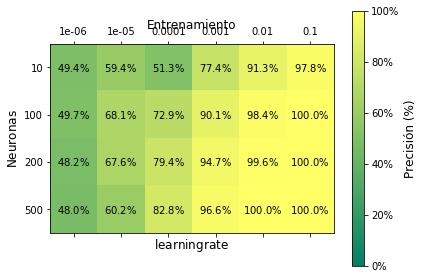

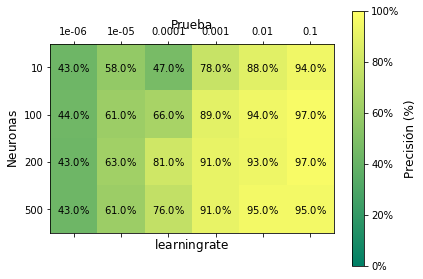

In [0]:
N_neuronas=np.array([10,100,200,500])
learning_rates=np.logspace(-6,-1,6)
grid_search(N_neuronas,learning_rates)

In [0]:
N = 16
data=pd.read_pickle('/content/drive/My Drive/TFG/Codigos/spins_16x16.pkl')
fase=pd.read_pickle('/content/drive/My Drive/TFG/Codigos/fase_16x16.pkl')

Entrenando con   10 neuronas, SGD y lr=0.000001.


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 0.613
Epoch: 0101 Cost = 0.613
Epoch: 0201 Cost = 0.613
Epoch: 0301 Cost = 0.613
Epoch: 0401 Cost = 0.613
Epoch: 0501 Cost = 0.613
Epoch: 0601 Cost = 0.613
Epoch: 0701 Cost = 0.613
Epoch: 0801 Cost = 0.613
Epoch: 0901 Cost = 0.613
Epoch: 1001 Cost = 0.613
Epoch: 1101 Cost = 0.613
Epoch: 1201 Cost = 0.612
Epoch: 1301 Cost = 0.612
Epoch: 1401 Cost = 0.612
Epoch: 1501 Cost = 0.612
Epoch: 1601 Cost = 0.612
Epoch: 1701 Cost = 0.612
Epoch: 1801 Cost = 0.612
Epoch: 1901 Cost = 0.612
Epoch: 2001 Cost = 0.612
Epoch: 2101 Cost = 0.612
Epoch: 2201 Cost = 0.612
Epoch: 2301 Cost = 0.612
Epoch: 2401 Cost = 0.612
Epoch: 2501 Cost = 0.612
Epoch: 2601 Cost = 0.612
Epoch: 2701 Cost = 0.612
Epoch: 2801 Cost = 0.612
Epoch: 2901 Cost = 0.611
Epoch: 3001 Cost = 0.611
Epoch: 3101 Cost = 0.611
Epoch: 3201 Cost = 0.611
Epoch: 3301 Cost = 0.611
Epoch: 3401 Cost = 0.611
Epoch: 3501 Cost = 0.611
Epoch: 3601 Cost = 0.611
Epoch: 3701 Cost = 0.611
Epoch: 3801 Cost = 0.611
Epoch: 3901 Cost = 0.611


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 0.808
Epoch: 0101 Cost = 0.808
Epoch: 0201 Cost = 0.807
Epoch: 0301 Cost = 0.807
Epoch: 0401 Cost = 0.807
Epoch: 0501 Cost = 0.807
Epoch: 0601 Cost = 0.807
Epoch: 0701 Cost = 0.806
Epoch: 0801 Cost = 0.806
Epoch: 0901 Cost = 0.806
Epoch: 1001 Cost = 0.806
Epoch: 1101 Cost = 0.806
Epoch: 1201 Cost = 0.806
Epoch: 1301 Cost = 0.805
Epoch: 1401 Cost = 0.805
Epoch: 1501 Cost = 0.805
Epoch: 1601 Cost = 0.805
Epoch: 1701 Cost = 0.805
Epoch: 1801 Cost = 0.805
Epoch: 1901 Cost = 0.804
Epoch: 2001 Cost = 0.804
Epoch: 2101 Cost = 0.804
Epoch: 2201 Cost = 0.804
Epoch: 2301 Cost = 0.804
Epoch: 2401 Cost = 0.803
Epoch: 2501 Cost = 0.803
Epoch: 2601 Cost = 0.803
Epoch: 2701 Cost = 0.803
Epoch: 2801 Cost = 0.803
Epoch: 2901 Cost = 0.803
Epoch: 3001 Cost = 0.802
Epoch: 3101 Cost = 0.802
Epoch: 3201 Cost = 0.802
Epoch: 3301 Cost = 0.802
Epoch: 3401 Cost = 0.802
Epoch: 3501 Cost = 0.802
Epoch: 3601 Cost = 0.801
Epoch: 3701 Cost = 0.801
Epoch: 3801 Cost = 0.801
Epoch: 3901 Cost = 0.801


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 1.031
Epoch: 0101 Cost = 1.029
Epoch: 0201 Cost = 1.027
Epoch: 0301 Cost = 1.025
Epoch: 0401 Cost = 1.023
Epoch: 0501 Cost = 1.021
Epoch: 0601 Cost = 1.019
Epoch: 0701 Cost = 1.017
Epoch: 0801 Cost = 1.015
Epoch: 0901 Cost = 1.013
Epoch: 1001 Cost = 1.011
Epoch: 1101 Cost = 1.010
Epoch: 1201 Cost = 1.008
Epoch: 1301 Cost = 1.006
Epoch: 1401 Cost = 1.004
Epoch: 1501 Cost = 1.002
Epoch: 1601 Cost = 1.000
Epoch: 1701 Cost = 0.999
Epoch: 1801 Cost = 0.997
Epoch: 1901 Cost = 0.995
Epoch: 2001 Cost = 0.994
Epoch: 2101 Cost = 0.992
Epoch: 2201 Cost = 0.990
Epoch: 2301 Cost = 0.989
Epoch: 2401 Cost = 0.987
Epoch: 2501 Cost = 0.985
Epoch: 2601 Cost = 0.984
Epoch: 2701 Cost = 0.982
Epoch: 2801 Cost = 0.980
Epoch: 2901 Cost = 0.979
Epoch: 3001 Cost = 0.977
Epoch: 3101 Cost = 0.976
Epoch: 3201 Cost = 0.974
Epoch: 3301 Cost = 0.973
Epoch: 3401 Cost = 0.971
Epoch: 3501 Cost = 0.970
Epoch: 3601 Cost = 0.968
Epoch: 3701 Cost = 0.967
Epoch: 3801 Cost = 0.965
Epoch: 3901 Cost = 0.964


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 1.345
Epoch: 0101 Cost = 1.242
Epoch: 0201 Cost = 1.152
Epoch: 0301 Cost = 1.074
Epoch: 0401 Cost = 1.005
Epoch: 0501 Cost = 0.941
Epoch: 0601 Cost = 0.885
Epoch: 0701 Cost = 0.837
Epoch: 0801 Cost = 0.796
Epoch: 0901 Cost = 0.762
Epoch: 1001 Cost = 0.734
Epoch: 1101 Cost = 0.711
Epoch: 1201 Cost = 0.691
Epoch: 1301 Cost = 0.675
Epoch: 1401 Cost = 0.661
Epoch: 1501 Cost = 0.649
Epoch: 1601 Cost = 0.639
Epoch: 1701 Cost = 0.630
Epoch: 1801 Cost = 0.622
Epoch: 1901 Cost = 0.615
Epoch: 2001 Cost = 0.609
Epoch: 2101 Cost = 0.603
Epoch: 2201 Cost = 0.598
Epoch: 2301 Cost = 0.593
Epoch: 2401 Cost = 0.589
Epoch: 2501 Cost = 0.585
Epoch: 2601 Cost = 0.581
Epoch: 2701 Cost = 0.578
Epoch: 2801 Cost = 0.575
Epoch: 2901 Cost = 0.571
Epoch: 3001 Cost = 0.568
Epoch: 3101 Cost = 0.565
Epoch: 3201 Cost = 0.562
Epoch: 3301 Cost = 0.560
Epoch: 3401 Cost = 0.557
Epoch: 3501 Cost = 0.554
Epoch: 3601 Cost = 0.552
Epoch: 3701 Cost = 0.549
Epoch: 3801 Cost = 0.547
Epoch: 3901 Cost = 0.544


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 0.924
Epoch: 0101 Cost = 0.660
Epoch: 0201 Cost = 0.600
Epoch: 0301 Cost = 0.570
Epoch: 0401 Cost = 0.547
Epoch: 0501 Cost = 0.526
Epoch: 0601 Cost = 0.508
Epoch: 0701 Cost = 0.491
Epoch: 0801 Cost = 0.476
Epoch: 0901 Cost = 0.461
Epoch: 1001 Cost = 0.448
Epoch: 1101 Cost = 0.435
Epoch: 1201 Cost = 0.424
Epoch: 1301 Cost = 0.414
Epoch: 1401 Cost = 0.404
Epoch: 1501 Cost = 0.396
Epoch: 1601 Cost = 0.388
Epoch: 1701 Cost = 0.380
Epoch: 1801 Cost = 0.374
Epoch: 1901 Cost = 0.368
Epoch: 2001 Cost = 0.363
Epoch: 2101 Cost = 0.358
Epoch: 2201 Cost = 0.354
Epoch: 2301 Cost = 0.350
Epoch: 2401 Cost = 0.347
Epoch: 2501 Cost = 0.343
Epoch: 2601 Cost = 0.340
Epoch: 2701 Cost = 0.337
Epoch: 2801 Cost = 0.334
Epoch: 2901 Cost = 0.332
Epoch: 3001 Cost = 0.329
Epoch: 3101 Cost = 0.326
Epoch: 3201 Cost = 0.324
Epoch: 3301 Cost = 0.321
Epoch: 3401 Cost = 0.319
Epoch: 3501 Cost = 0.316
Epoch: 3601 Cost = 0.314
Epoch: 3701 Cost = 0.312
Epoch: 3801 Cost = 0.309
Epoch: 3901 Cost = 0.307


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 1.796
Epoch: 0101 Cost = 0.518
Epoch: 0201 Cost = 0.454
Epoch: 0301 Cost = 0.395
Epoch: 0401 Cost = 0.360
Epoch: 0501 Cost = 0.333
Epoch: 0601 Cost = 0.314
Epoch: 0701 Cost = 0.297
Epoch: 0801 Cost = 0.283
Epoch: 0901 Cost = 0.272
Epoch: 1001 Cost = 0.263
Epoch: 1101 Cost = 0.255
Epoch: 1201 Cost = 0.248
Epoch: 1301 Cost = 0.241
Epoch: 1401 Cost = 0.234
Epoch: 1501 Cost = 0.228
Epoch: 1601 Cost = 0.221
Epoch: 1701 Cost = 0.215
Epoch: 1801 Cost = 0.209
Epoch: 1901 Cost = 0.203
Epoch: 2001 Cost = 0.197
Epoch: 2101 Cost = 0.191
Epoch: 2201 Cost = 0.186
Epoch: 2301 Cost = 0.180
Epoch: 2401 Cost = 0.175
Epoch: 2501 Cost = 0.170
Epoch: 2601 Cost = 0.165
Epoch: 2701 Cost = 0.160
Epoch: 2801 Cost = 0.156
Epoch: 2901 Cost = 0.151
Epoch: 3001 Cost = 0.147
Epoch: 3101 Cost = 0.143
Epoch: 3201 Cost = 0.139
Epoch: 3301 Cost = 0.135
Epoch: 3401 Cost = 0.131
Epoch: 3501 Cost = 0.128
Epoch: 3601 Cost = 0.125
Epoch: 3701 Cost = 0.122
Epoch: 3801 Cost = 0.120
Epoch: 3901 Cost = 0.117


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 8.109
Epoch: 0101 Cost = 8.107
Epoch: 0201 Cost = 8.105
Epoch: 0301 Cost = 8.103
Epoch: 0401 Cost = 8.101
Epoch: 0501 Cost = 8.099
Epoch: 0601 Cost = 8.097
Epoch: 0701 Cost = 8.095
Epoch: 0801 Cost = 8.093
Epoch: 0901 Cost = 8.091
Epoch: 1001 Cost = 8.089
Epoch: 1101 Cost = 8.087
Epoch: 1201 Cost = 8.084
Epoch: 1301 Cost = 8.082
Epoch: 1401 Cost = 8.080
Epoch: 1501 Cost = 8.078
Epoch: 1601 Cost = 8.076
Epoch: 1701 Cost = 8.074
Epoch: 1801 Cost = 8.072
Epoch: 1901 Cost = 8.070
Epoch: 2001 Cost = 8.068
Epoch: 2101 Cost = 8.066
Epoch: 2201 Cost = 8.064
Epoch: 2301 Cost = 8.062
Epoch: 2401 Cost = 8.060
Epoch: 2501 Cost = 8.057
Epoch: 2601 Cost = 8.055
Epoch: 2701 Cost = 8.053
Epoch: 2801 Cost = 8.051
Epoch: 2901 Cost = 8.049
Epoch: 3001 Cost = 8.047
Epoch: 3101 Cost = 8.045
Epoch: 3201 Cost = 8.043
Epoch: 3301 Cost = 8.041
Epoch: 3401 Cost = 8.039
Epoch: 3501 Cost = 8.037
Epoch: 3601 Cost = 8.035
Epoch: 3701 Cost = 8.033
Epoch: 3801 Cost = 8.031
Epoch: 3901 Cost = 8.028


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 2.898
Epoch: 0101 Cost = 2.799
Epoch: 0201 Cost = 2.704
Epoch: 0301 Cost = 2.612
Epoch: 0401 Cost = 2.524
Epoch: 0501 Cost = 2.439
Epoch: 0601 Cost = 2.358
Epoch: 0701 Cost = 2.280
Epoch: 0801 Cost = 2.206
Epoch: 0901 Cost = 2.135
Epoch: 1001 Cost = 2.068
Epoch: 1101 Cost = 2.004
Epoch: 1201 Cost = 1.944
Epoch: 1301 Cost = 1.887
Epoch: 1401 Cost = 1.834
Epoch: 1501 Cost = 1.784
Epoch: 1601 Cost = 1.738
Epoch: 1701 Cost = 1.694
Epoch: 1801 Cost = 1.654
Epoch: 1901 Cost = 1.616
Epoch: 2001 Cost = 1.581
Epoch: 2101 Cost = 1.548
Epoch: 2201 Cost = 1.518
Epoch: 2301 Cost = 1.490
Epoch: 2401 Cost = 1.463
Epoch: 2501 Cost = 1.439
Epoch: 2601 Cost = 1.416
Epoch: 2701 Cost = 1.395
Epoch: 2801 Cost = 1.375
Epoch: 2901 Cost = 1.356
Epoch: 3001 Cost = 1.339
Epoch: 3101 Cost = 1.323
Epoch: 3201 Cost = 1.307
Epoch: 3301 Cost = 1.293
Epoch: 3401 Cost = 1.279
Epoch: 3501 Cost = 1.267
Epoch: 3601 Cost = 1.255
Epoch: 3701 Cost = 1.243
Epoch: 3801 Cost = 1.233
Epoch: 3901 Cost = 1.223


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 5.671
Epoch: 0101 Cost = 5.261
Epoch: 0201 Cost = 4.859
Epoch: 0301 Cost = 4.470
Epoch: 0401 Cost = 4.102
Epoch: 0501 Cost = 3.757
Epoch: 0601 Cost = 3.437
Epoch: 0701 Cost = 3.136
Epoch: 0801 Cost = 2.852
Epoch: 0901 Cost = 2.583
Epoch: 1001 Cost = 2.328
Epoch: 1101 Cost = 2.087
Epoch: 1201 Cost = 1.863
Epoch: 1301 Cost = 1.658
Epoch: 1401 Cost = 1.476
Epoch: 1501 Cost = 1.320
Epoch: 1601 Cost = 1.191
Epoch: 1701 Cost = 1.089
Epoch: 1801 Cost = 1.011
Epoch: 1901 Cost = 0.951
Epoch: 2001 Cost = 0.907
Epoch: 2101 Cost = 0.873
Epoch: 2201 Cost = 0.847
Epoch: 2301 Cost = 0.828
Epoch: 2401 Cost = 0.812
Epoch: 2501 Cost = 0.800
Epoch: 2601 Cost = 0.791
Epoch: 2701 Cost = 0.783
Epoch: 2801 Cost = 0.776
Epoch: 2901 Cost = 0.770
Epoch: 3001 Cost = 0.765
Epoch: 3101 Cost = 0.761
Epoch: 3201 Cost = 0.757
Epoch: 3301 Cost = 0.754
Epoch: 3401 Cost = 0.751
Epoch: 3501 Cost = 0.748
Epoch: 3601 Cost = 0.745
Epoch: 3701 Cost = 0.742
Epoch: 3801 Cost = 0.740
Epoch: 3901 Cost = 0.738


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 3.290
Epoch: 0101 Cost = 2.136
Epoch: 0201 Cost = 1.569
Epoch: 0301 Cost = 1.316
Epoch: 0401 Cost = 1.152
Epoch: 0501 Cost = 1.039
Epoch: 0601 Cost = 0.957
Epoch: 0701 Cost = 0.895
Epoch: 0801 Cost = 0.847
Epoch: 0901 Cost = 0.808
Epoch: 1001 Cost = 0.776
Epoch: 1101 Cost = 0.750
Epoch: 1201 Cost = 0.728
Epoch: 1301 Cost = 0.710
Epoch: 1401 Cost = 0.694
Epoch: 1501 Cost = 0.680
Epoch: 1601 Cost = 0.668
Epoch: 1701 Cost = 0.657
Epoch: 1801 Cost = 0.648
Epoch: 1901 Cost = 0.639
Epoch: 2001 Cost = 0.632
Epoch: 2101 Cost = 0.625
Epoch: 2201 Cost = 0.619
Epoch: 2301 Cost = 0.613
Epoch: 2401 Cost = 0.608
Epoch: 2501 Cost = 0.603
Epoch: 2601 Cost = 0.598
Epoch: 2701 Cost = 0.594
Epoch: 2801 Cost = 0.590
Epoch: 2901 Cost = 0.587
Epoch: 3001 Cost = 0.583
Epoch: 3101 Cost = 0.580
Epoch: 3201 Cost = 0.577
Epoch: 3301 Cost = 0.574
Epoch: 3401 Cost = 0.571
Epoch: 3501 Cost = 0.569
Epoch: 3601 Cost = 0.566
Epoch: 3701 Cost = 0.564
Epoch: 3801 Cost = 0.562
Epoch: 3901 Cost = 0.560


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 1.613
Epoch: 0101 Cost = 0.767
Epoch: 0201 Cost = 0.637
Epoch: 0301 Cost = 0.577
Epoch: 0401 Cost = 0.540
Epoch: 0501 Cost = 0.516
Epoch: 0601 Cost = 0.497
Epoch: 0701 Cost = 0.484
Epoch: 0801 Cost = 0.472
Epoch: 0901 Cost = 0.463
Epoch: 1001 Cost = 0.455
Epoch: 1101 Cost = 0.447
Epoch: 1201 Cost = 0.441
Epoch: 1301 Cost = 0.435
Epoch: 1401 Cost = 0.429
Epoch: 1501 Cost = 0.424
Epoch: 1601 Cost = 0.419
Epoch: 1701 Cost = 0.414
Epoch: 1801 Cost = 0.409
Epoch: 1901 Cost = 0.405
Epoch: 2001 Cost = 0.400
Epoch: 2101 Cost = 0.396
Epoch: 2201 Cost = 0.392
Epoch: 2301 Cost = 0.388
Epoch: 2401 Cost = 0.385
Epoch: 2501 Cost = 0.381
Epoch: 2601 Cost = 0.378
Epoch: 2701 Cost = 0.375
Epoch: 2801 Cost = 0.372
Epoch: 2901 Cost = 0.369
Epoch: 3001 Cost = 0.367
Epoch: 3101 Cost = 0.364
Epoch: 3201 Cost = 0.362
Epoch: 3301 Cost = 0.360
Epoch: 3401 Cost = 0.357
Epoch: 3501 Cost = 0.355
Epoch: 3601 Cost = 0.353
Epoch: 3701 Cost = 0.351
Epoch: 3801 Cost = 0.349
Epoch: 3901 Cost = 0.347


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 3.575
Epoch: 0101 Cost = 0.448
Epoch: 0201 Cost = 0.388
Epoch: 0301 Cost = 0.351
Epoch: 0401 Cost = 0.329
Epoch: 0501 Cost = 0.314
Epoch: 0601 Cost = 0.305
Epoch: 0701 Cost = 0.297
Epoch: 0801 Cost = 0.291
Epoch: 0901 Cost = 0.287
Epoch: 1001 Cost = 0.283
Epoch: 1101 Cost = 0.280
Epoch: 1201 Cost = 0.278
Epoch: 1301 Cost = 0.276
Epoch: 1401 Cost = 0.274
Epoch: 1501 Cost = 0.272
Epoch: 1601 Cost = 0.271
Epoch: 1701 Cost = 0.270
Epoch: 1801 Cost = 0.269
Epoch: 1901 Cost = 0.268
Epoch: 2001 Cost = 0.268
Epoch: 2101 Cost = 0.267
Epoch: 2201 Cost = 0.266
Epoch: 2301 Cost = 0.266
Epoch: 2401 Cost = 0.265
Epoch: 2501 Cost = 0.265
Epoch: 2601 Cost = 0.264
Epoch: 2701 Cost = 0.264
Epoch: 2801 Cost = 0.264
Epoch: 2901 Cost = 0.263
Epoch: 3001 Cost = 0.263
Epoch: 3101 Cost = 0.263
Epoch: 3201 Cost = 0.262
Epoch: 3301 Cost = 0.262
Epoch: 3401 Cost = 0.262
Epoch: 3501 Cost = 0.261
Epoch: 3601 Cost = 0.261
Epoch: 3701 Cost = 0.261
Epoch: 3801 Cost = 0.261
Epoch: 3901 Cost = 0.260


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 5.773
Epoch: 0101 Cost = 5.770
Epoch: 0201 Cost = 5.767
Epoch: 0301 Cost = 5.764
Epoch: 0401 Cost = 5.760
Epoch: 0501 Cost = 5.757
Epoch: 0601 Cost = 5.754
Epoch: 0701 Cost = 5.751
Epoch: 0801 Cost = 5.748
Epoch: 0901 Cost = 5.745
Epoch: 1001 Cost = 5.742
Epoch: 1101 Cost = 5.739
Epoch: 1201 Cost = 5.735
Epoch: 1301 Cost = 5.732
Epoch: 1401 Cost = 5.729
Epoch: 1501 Cost = 5.726
Epoch: 1601 Cost = 5.723
Epoch: 1701 Cost = 5.720
Epoch: 1801 Cost = 5.717
Epoch: 1901 Cost = 5.714
Epoch: 2001 Cost = 5.711
Epoch: 2101 Cost = 5.707
Epoch: 2201 Cost = 5.704
Epoch: 2301 Cost = 5.701
Epoch: 2401 Cost = 5.698
Epoch: 2501 Cost = 5.695
Epoch: 2601 Cost = 5.692
Epoch: 2701 Cost = 5.689
Epoch: 2801 Cost = 5.686
Epoch: 2901 Cost = 5.683
Epoch: 3001 Cost = 5.680
Epoch: 3101 Cost = 5.676
Epoch: 3201 Cost = 5.673
Epoch: 3301 Cost = 5.670
Epoch: 3401 Cost = 5.667
Epoch: 3501 Cost = 5.664
Epoch: 3601 Cost = 5.661
Epoch: 3701 Cost = 5.658
Epoch: 3801 Cost = 5.655
Epoch: 3901 Cost = 5.652


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 14.641
Epoch: 0101 Cost = 14.512
Epoch: 0201 Cost = 14.384
Epoch: 0301 Cost = 14.257
Epoch: 0401 Cost = 14.132
Epoch: 0501 Cost = 14.008
Epoch: 0601 Cost = 13.886
Epoch: 0701 Cost = 13.765
Epoch: 0801 Cost = 13.646
Epoch: 0901 Cost = 13.529
Epoch: 1001 Cost = 13.413
Epoch: 1101 Cost = 13.299
Epoch: 1201 Cost = 13.186
Epoch: 1301 Cost = 13.075
Epoch: 1401 Cost = 12.965
Epoch: 1501 Cost = 12.857
Epoch: 1601 Cost = 12.750
Epoch: 1701 Cost = 12.645
Epoch: 1801 Cost = 12.541
Epoch: 1901 Cost = 12.438
Epoch: 2001 Cost = 12.337
Epoch: 2101 Cost = 12.237
Epoch: 2201 Cost = 12.138
Epoch: 2301 Cost = 12.040
Epoch: 2401 Cost = 11.943
Epoch: 2501 Cost = 11.847
Epoch: 2601 Cost = 11.752
Epoch: 2701 Cost = 11.658
Epoch: 2801 Cost = 11.565
Epoch: 2901 Cost = 11.473
Epoch: 3001 Cost = 11.382
Epoch: 3101 Cost = 11.291
Epoch: 3201 Cost = 11.201
Epoch: 3301 Cost = 11.112
Epoch: 3401 Cost = 11.023
Epoch: 3501 Cost = 10.935
Epoch: 3601 Cost = 10.847
Epoch: 3701 Cost = 10.760
Epoch: 3801 

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 6.089
Epoch: 0101 Cost = 5.687
Epoch: 0201 Cost = 5.305
Epoch: 0301 Cost = 4.943
Epoch: 0401 Cost = 4.601
Epoch: 0501 Cost = 4.283
Epoch: 0601 Cost = 3.988
Epoch: 0701 Cost = 3.717
Epoch: 0801 Cost = 3.472
Epoch: 0901 Cost = 3.250
Epoch: 1001 Cost = 3.052
Epoch: 1101 Cost = 2.878
Epoch: 1201 Cost = 2.725
Epoch: 1301 Cost = 2.594
Epoch: 1401 Cost = 2.481
Epoch: 1501 Cost = 2.386
Epoch: 1601 Cost = 2.307
Epoch: 1701 Cost = 2.241
Epoch: 1801 Cost = 2.185
Epoch: 1901 Cost = 2.139
Epoch: 2001 Cost = 2.098
Epoch: 2101 Cost = 2.063
Epoch: 2201 Cost = 2.032
Epoch: 2301 Cost = 2.003
Epoch: 2401 Cost = 1.977
Epoch: 2501 Cost = 1.952
Epoch: 2601 Cost = 1.929
Epoch: 2701 Cost = 1.907
Epoch: 2801 Cost = 1.885
Epoch: 2901 Cost = 1.865
Epoch: 3001 Cost = 1.845
Epoch: 3101 Cost = 1.826
Epoch: 3201 Cost = 1.808
Epoch: 3301 Cost = 1.790
Epoch: 3401 Cost = 1.773
Epoch: 3501 Cost = 1.756
Epoch: 3601 Cost = 1.740
Epoch: 3701 Cost = 1.725
Epoch: 3801 Cost = 1.710
Epoch: 3901 Cost = 1.695


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 2.916
Epoch: 0101 Cost = 2.244
Epoch: 0201 Cost = 1.987
Epoch: 0301 Cost = 1.811
Epoch: 0401 Cost = 1.683
Epoch: 0501 Cost = 1.583
Epoch: 0601 Cost = 1.504
Epoch: 0701 Cost = 1.438
Epoch: 0801 Cost = 1.383
Epoch: 0901 Cost = 1.337
Epoch: 1001 Cost = 1.297
Epoch: 1101 Cost = 1.263
Epoch: 1201 Cost = 1.235
Epoch: 1301 Cost = 1.209
Epoch: 1401 Cost = 1.187
Epoch: 1501 Cost = 1.168
Epoch: 1601 Cost = 1.151
Epoch: 1701 Cost = 1.135
Epoch: 1801 Cost = 1.121
Epoch: 1901 Cost = 1.108
Epoch: 2001 Cost = 1.096
Epoch: 2101 Cost = 1.086
Epoch: 2201 Cost = 1.076
Epoch: 2301 Cost = 1.066
Epoch: 2401 Cost = 1.057
Epoch: 2501 Cost = 1.049
Epoch: 2601 Cost = 1.041
Epoch: 2701 Cost = 1.034
Epoch: 2801 Cost = 1.027
Epoch: 2901 Cost = 1.020
Epoch: 3001 Cost = 1.014
Epoch: 3101 Cost = 1.008
Epoch: 3201 Cost = 1.002
Epoch: 3301 Cost = 0.996
Epoch: 3401 Cost = 0.991
Epoch: 3501 Cost = 0.986
Epoch: 3601 Cost = 0.981
Epoch: 3701 Cost = 0.976
Epoch: 3801 Cost = 0.971
Epoch: 3901 Cost = 0.966


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 9.974
Epoch: 0101 Cost = 1.154
Epoch: 0201 Cost = 0.936
Epoch: 0301 Cost = 0.863
Epoch: 0401 Cost = 0.823
Epoch: 0501 Cost = 0.795
Epoch: 0601 Cost = 0.773
Epoch: 0701 Cost = 0.754
Epoch: 0801 Cost = 0.738
Epoch: 0901 Cost = 0.724
Epoch: 1001 Cost = 0.711
Epoch: 1101 Cost = 0.699
Epoch: 1201 Cost = 0.688
Epoch: 1301 Cost = 0.679
Epoch: 1401 Cost = 0.670
Epoch: 1501 Cost = 0.662
Epoch: 1601 Cost = 0.654
Epoch: 1701 Cost = 0.647
Epoch: 1801 Cost = 0.641
Epoch: 1901 Cost = 0.635
Epoch: 2001 Cost = 0.629
Epoch: 2101 Cost = 0.624
Epoch: 2201 Cost = 0.619
Epoch: 2301 Cost = 0.614
Epoch: 2401 Cost = 0.610
Epoch: 2501 Cost = 0.605
Epoch: 2601 Cost = 0.601
Epoch: 2701 Cost = 0.598
Epoch: 2801 Cost = 0.594
Epoch: 2901 Cost = 0.591
Epoch: 3001 Cost = 0.587
Epoch: 3101 Cost = 0.584
Epoch: 3201 Cost = 0.581
Epoch: 3301 Cost = 0.578
Epoch: 3401 Cost = 0.576
Epoch: 3501 Cost = 0.573
Epoch: 3601 Cost = 0.570
Epoch: 3701 Cost = 0.568
Epoch: 3801 Cost = 0.566
Epoch: 3901 Cost = 0.564


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 3.682
Epoch: 0101 Cost = 0.749
Epoch: 0201 Cost = 0.650
Epoch: 0301 Cost = 0.596
Epoch: 0401 Cost = 0.566
Epoch: 0501 Cost = 0.550
Epoch: 0601 Cost = 0.541
Epoch: 0701 Cost = 0.537
Epoch: 0801 Cost = 0.533
Epoch: 0901 Cost = 0.531
Epoch: 1001 Cost = 0.529
Epoch: 1101 Cost = 0.528
Epoch: 1201 Cost = 0.527
Epoch: 1301 Cost = 0.526
Epoch: 1401 Cost = 0.525
Epoch: 1501 Cost = 0.524
Epoch: 1601 Cost = 0.524
Epoch: 1701 Cost = 0.523
Epoch: 1801 Cost = 0.523
Epoch: 1901 Cost = 0.522
Epoch: 2001 Cost = 0.522
Epoch: 2101 Cost = 0.521
Epoch: 2201 Cost = 0.521
Epoch: 2301 Cost = 0.520
Epoch: 2401 Cost = 0.520
Epoch: 2501 Cost = 0.520
Epoch: 2601 Cost = 0.519
Epoch: 2701 Cost = 0.519
Epoch: 2801 Cost = 0.518
Epoch: 2901 Cost = 0.518
Epoch: 3001 Cost = 0.518
Epoch: 3101 Cost = 0.518
Epoch: 3201 Cost = 0.517
Epoch: 3301 Cost = 0.517
Epoch: 3401 Cost = 0.517
Epoch: 3501 Cost = 0.516
Epoch: 3601 Cost = 0.516
Epoch: 3701 Cost = 0.516
Epoch: 3801 Cost = 0.515
Epoch: 3901 Cost = 0.515


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 9.317
Epoch: 0101 Cost = 9.294
Epoch: 0201 Cost = 9.270
Epoch: 0301 Cost = 9.246
Epoch: 0401 Cost = 9.222
Epoch: 0501 Cost = 9.199
Epoch: 0601 Cost = 9.175
Epoch: 0701 Cost = 9.151
Epoch: 0801 Cost = 9.127
Epoch: 0901 Cost = 9.104
Epoch: 1001 Cost = 9.080
Epoch: 1101 Cost = 9.056
Epoch: 1201 Cost = 9.033
Epoch: 1301 Cost = 9.009
Epoch: 1401 Cost = 8.986
Epoch: 1501 Cost = 8.962
Epoch: 1601 Cost = 8.939
Epoch: 1701 Cost = 8.915
Epoch: 1801 Cost = 8.892
Epoch: 1901 Cost = 8.869
Epoch: 2001 Cost = 8.845
Epoch: 2101 Cost = 8.822
Epoch: 2201 Cost = 8.799
Epoch: 2301 Cost = 8.775
Epoch: 2401 Cost = 8.752
Epoch: 2501 Cost = 8.729
Epoch: 2601 Cost = 8.705
Epoch: 2701 Cost = 8.682
Epoch: 2801 Cost = 8.659
Epoch: 2901 Cost = 8.636
Epoch: 3001 Cost = 8.612
Epoch: 3101 Cost = 8.589
Epoch: 3201 Cost = 8.566
Epoch: 3301 Cost = 8.543
Epoch: 3401 Cost = 8.519
Epoch: 3501 Cost = 8.496
Epoch: 3601 Cost = 8.473
Epoch: 3701 Cost = 8.450
Epoch: 3801 Cost = 8.427
Epoch: 3901 Cost = 8.404


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 4.471
Epoch: 0101 Cost = 4.443
Epoch: 0201 Cost = 4.416
Epoch: 0301 Cost = 4.389
Epoch: 0401 Cost = 4.363
Epoch: 0501 Cost = 4.338
Epoch: 0601 Cost = 4.313
Epoch: 0701 Cost = 4.289
Epoch: 0801 Cost = 4.265
Epoch: 0901 Cost = 4.242
Epoch: 1001 Cost = 4.220
Epoch: 1101 Cost = 4.198
Epoch: 1201 Cost = 4.176
Epoch: 1301 Cost = 4.155
Epoch: 1401 Cost = 4.135
Epoch: 1501 Cost = 4.115
Epoch: 1601 Cost = 4.096
Epoch: 1701 Cost = 4.077
Epoch: 1801 Cost = 4.059
Epoch: 1901 Cost = 4.041
Epoch: 2001 Cost = 4.023
Epoch: 2101 Cost = 4.006
Epoch: 2201 Cost = 3.990
Epoch: 2301 Cost = 3.973
Epoch: 2401 Cost = 3.958
Epoch: 2501 Cost = 3.942
Epoch: 2601 Cost = 3.927
Epoch: 2701 Cost = 3.913
Epoch: 2801 Cost = 3.898
Epoch: 2901 Cost = 3.884
Epoch: 3001 Cost = 3.871
Epoch: 3101 Cost = 3.858
Epoch: 3201 Cost = 3.845
Epoch: 3301 Cost = 3.832
Epoch: 3401 Cost = 3.820
Epoch: 3501 Cost = 3.808
Epoch: 3601 Cost = 3.797
Epoch: 3701 Cost = 3.785
Epoch: 3801 Cost = 3.774
Epoch: 3901 Cost = 3.763


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 14.897
Epoch: 0101 Cost = 12.115
Epoch: 0201 Cost = 9.607
Epoch: 0301 Cost = 7.313
Epoch: 0401 Cost = 5.194
Epoch: 0501 Cost = 3.433
Epoch: 0601 Cost = 2.763
Epoch: 0701 Cost = 2.518
Epoch: 0801 Cost = 2.373
Epoch: 0901 Cost = 2.270
Epoch: 1001 Cost = 2.194
Epoch: 1101 Cost = 2.135
Epoch: 1201 Cost = 2.088
Epoch: 1301 Cost = 2.051
Epoch: 1401 Cost = 2.021
Epoch: 1501 Cost = 1.997
Epoch: 1601 Cost = 1.977
Epoch: 1701 Cost = 1.961
Epoch: 1801 Cost = 1.947
Epoch: 1901 Cost = 1.936
Epoch: 2001 Cost = 1.927
Epoch: 2101 Cost = 1.919
Epoch: 2201 Cost = 1.912
Epoch: 2301 Cost = 1.906
Epoch: 2401 Cost = 1.901
Epoch: 2501 Cost = 1.896
Epoch: 2601 Cost = 1.892
Epoch: 2701 Cost = 1.889
Epoch: 2801 Cost = 1.885
Epoch: 2901 Cost = 1.882
Epoch: 3001 Cost = 1.880
Epoch: 3101 Cost = 1.877
Epoch: 3201 Cost = 1.875
Epoch: 3301 Cost = 1.872
Epoch: 3401 Cost = 1.870
Epoch: 3501 Cost = 1.868
Epoch: 3601 Cost = 1.866
Epoch: 3701 Cost = 1.865
Epoch: 3801 Cost = 1.863
Epoch: 3901 Cost = 1.86

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 9.768
Epoch: 0101 Cost = 4.451
Epoch: 0201 Cost = 3.431
Epoch: 0301 Cost = 2.918
Epoch: 0401 Cost = 2.628
Epoch: 0501 Cost = 2.446
Epoch: 0601 Cost = 2.324
Epoch: 0701 Cost = 2.236
Epoch: 0801 Cost = 2.170
Epoch: 0901 Cost = 2.119
Epoch: 1001 Cost = 2.078
Epoch: 1101 Cost = 2.044
Epoch: 1201 Cost = 2.016
Epoch: 1301 Cost = 1.991
Epoch: 1401 Cost = 1.969
Epoch: 1501 Cost = 1.951
Epoch: 1601 Cost = 1.934
Epoch: 1701 Cost = 1.919
Epoch: 1801 Cost = 1.906
Epoch: 1901 Cost = 1.894
Epoch: 2001 Cost = 1.883
Epoch: 2101 Cost = 1.873
Epoch: 2201 Cost = 1.863
Epoch: 2301 Cost = 1.855
Epoch: 2401 Cost = 1.847
Epoch: 2501 Cost = 1.840
Epoch: 2601 Cost = 1.833
Epoch: 2701 Cost = 1.826
Epoch: 2801 Cost = 1.820
Epoch: 2901 Cost = 1.814
Epoch: 3001 Cost = 1.808
Epoch: 3101 Cost = 1.803
Epoch: 3201 Cost = 1.798
Epoch: 3301 Cost = 1.792
Epoch: 3401 Cost = 1.787
Epoch: 3501 Cost = 1.782
Epoch: 3601 Cost = 1.777
Epoch: 3701 Cost = 1.773
Epoch: 3801 Cost = 1.768
Epoch: 3901 Cost = 1.763


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 4.333
Epoch: 0101 Cost = 2.199
Epoch: 0201 Cost = 2.045
Epoch: 0301 Cost = 1.960
Epoch: 0401 Cost = 1.895
Epoch: 0501 Cost = 1.841
Epoch: 0601 Cost = 1.795
Epoch: 0701 Cost = 1.754
Epoch: 0801 Cost = 1.720
Epoch: 0901 Cost = 1.688
Epoch: 1001 Cost = 1.660
Epoch: 1101 Cost = 1.634
Epoch: 1201 Cost = 1.608
Epoch: 1301 Cost = 1.585
Epoch: 1401 Cost = 1.562
Epoch: 1501 Cost = 1.540
Epoch: 1601 Cost = 1.520
Epoch: 1701 Cost = 1.501
Epoch: 1801 Cost = 1.483
Epoch: 1901 Cost = 1.468
Epoch: 2001 Cost = 1.453
Epoch: 2101 Cost = 1.441
Epoch: 2201 Cost = 1.430
Epoch: 2301 Cost = 1.420
Epoch: 2401 Cost = 1.411
Epoch: 2501 Cost = 1.402
Epoch: 2601 Cost = 1.395
Epoch: 2701 Cost = 1.388
Epoch: 2801 Cost = 1.381
Epoch: 2901 Cost = 1.375
Epoch: 3001 Cost = 1.370
Epoch: 3101 Cost = 1.365
Epoch: 3201 Cost = 1.360
Epoch: 3301 Cost = 1.356
Epoch: 3401 Cost = 1.352
Epoch: 3501 Cost = 1.348
Epoch: 3601 Cost = 1.345
Epoch: 3701 Cost = 1.341
Epoch: 3801 Cost = 1.338
Epoch: 3901 Cost = 1.335


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost = 4.617
Epoch: 0101 Cost = 1.688
Epoch: 0201 Cost = 1.473
Epoch: 0301 Cost = 1.359
Epoch: 0401 Cost = 1.324
Epoch: 0501 Cost = 1.306
Epoch: 0601 Cost = 1.297
Epoch: 0701 Cost = 1.294
Epoch: 0801 Cost = 1.292
Epoch: 0901 Cost = 1.291
Epoch: 1001 Cost = 1.290
Epoch: 1101 Cost = 1.289
Epoch: 1201 Cost = 1.288
Epoch: 1301 Cost = 1.288
Epoch: 1401 Cost = 1.287
Epoch: 1501 Cost = 1.286
Epoch: 1601 Cost = 1.286
Epoch: 1701 Cost = 1.285
Epoch: 1801 Cost = 1.285
Epoch: 1901 Cost = 1.284
Epoch: 2001 Cost = 1.283
Epoch: 2101 Cost = 1.283
Epoch: 2201 Cost = 1.282
Epoch: 2301 Cost = 1.282
Epoch: 2401 Cost = 1.281
Epoch: 2501 Cost = 1.281
Epoch: 2601 Cost = 1.280
Epoch: 2701 Cost = 1.280
Epoch: 2801 Cost = 1.279
Epoch: 2901 Cost = 1.278
Epoch: 3001 Cost = 1.278
Epoch: 3101 Cost = 1.277
Epoch: 3201 Cost = 1.277
Epoch: 3301 Cost = 1.276
Epoch: 3401 Cost = 1.276
Epoch: 3501 Cost = 1.275
Epoch: 3601 Cost = 1.275
Epoch: 3701 Cost = 1.274
Epoch: 3801 Cost = 1.274
Epoch: 3901 Cost = 1.273


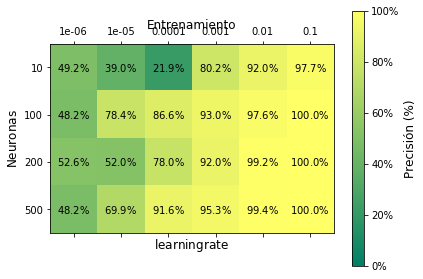

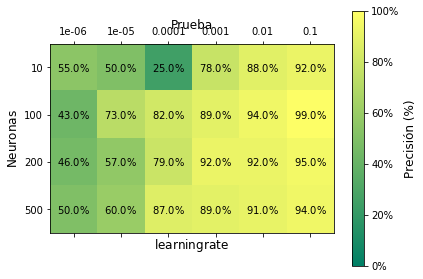

In [0]:
grid_search(N_neuronas,learning_rates)